In [1]:
import numpy as np
import matplotlib.pyplot as plt

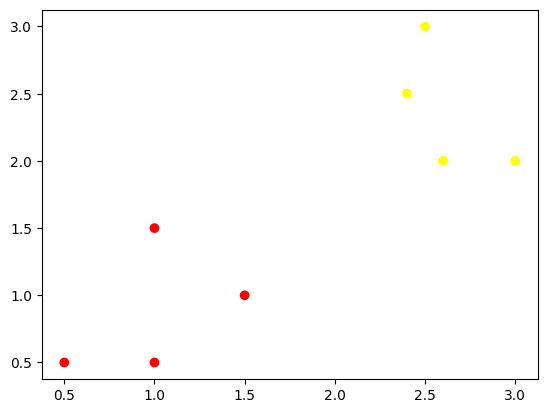

In [2]:
data = [[0.5, 0.5], [1, 0.5], [1, 1.5], [1.5, 1], [2.6, 2], [3, 2], [2.4, 2.5], [2.5, 3]]
# label = [0,0,0,0,1,1,1,1]
label = ['red', 'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 'yellow']
plt.scatter(x = [i[0] for i in data], y = [i[1] for i in data], c = label,)

In [3]:
from sklearn.manifold import TSNE
m = TSNE(n_components=2,perplexity=3)
X_embeded = m.fit_transform(np.array(data))

In [11]:
m.fit(np.array(data))


array([[-84.43402 ,  51.453125],
       [-84.97851 ,  36.672237],
       [-64.03669 ,  43.462982],
       [-70.05214 ,  30.32683 ],
       [ 42.77488 , -28.618057],
       [ 38.380558, -42.32143 ],
       [ 56.73464 , -38.38609 ],
       [ 64.425385, -25.803408]], dtype=float32)

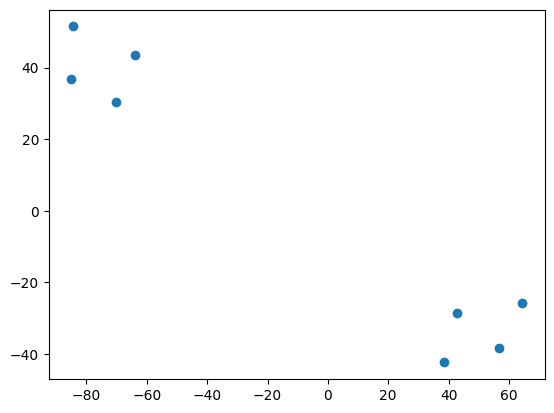

In [7]:
plt.scatter(x = [i[0] for i in X_embeded], y = [i[1] for i in X_embeded],)

In [3]:
def kmeans(data, n_clusters, max_iters = 300):

    #size
    n_samples = data.shape[0]
    # chose k random centroids
    centroids = data[np.random.choice(n_samples, n_clusters, replace=False)]

    # Iterations
    for _ in range(max_iters):
        assignments = np.argmin(np.linalg.norm(data[:,None]-centroids, axis =2), axis=1)

        old_centroids  = centroids

        for i in range(n_clusters):
            centroids[i] = np.mean(data[assignments == i], axis=0)

        # Check for stop conditioln
        if np.all(old_centroids == centroids):
            break
    
    return centroids, assignments

        

In [4]:
centroids, labels = kmeans(pd.DataFrame(data).values,2,3)
plt.scatter(x = [i[0] for i in data], y = [i[1] for i in data], c = labels)
print(centroids[0])
print(centroids[1])

NameError: name 'pd' is not defined

[2.16666667 2.        ]
[0.75 0.5 ]


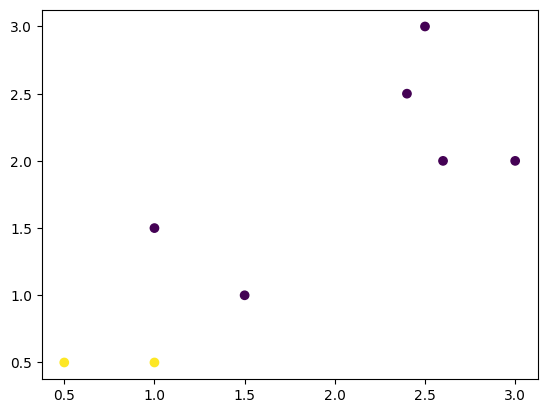

In [99]:
centroids, labels = kmeans(pd.DataFrame(data).values,2,3)
plt.scatter(x = [i[0] for i in data], y = [i[1] for i in data], c = labels)
print(centroids[0])
print(centroids[1])

[2.625 2.375]
[1.    0.875]


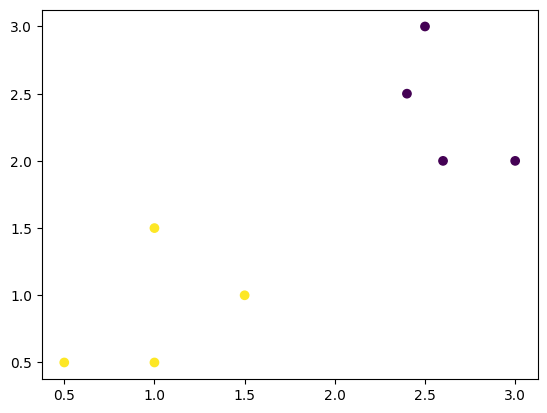

In [100]:
centroids, labels = kmeans(pd.DataFrame(data).values,2,3)
plt.scatter(x = [i[0] for i in data], y = [i[1] for i in data], c = labels)
print(centroids[0])
print(centroids[1])

In [104]:
import random

1.0465588367154977

# Bad KNN example

In [121]:
import numpy as np

def generate_circle_points(num_points, radius=1.0, dispersion=0.2):
  angles = np.random.rand(num_points) * 2 * np.pi

  # Generate random noise based on dispersion factor
  noise = np.random.rand(num_points) * dispersion

  # Calculate x and y coordinates using polar coordinates and noise
  x = radius * np.cos(angles) + noise * np.random.randn(num_points)
  y = radius * np.sin(angles) + noise * np.random.randn(num_points)

  # Combine x and y coordinates into a single array
  return np.stack((x, y), axis=1)

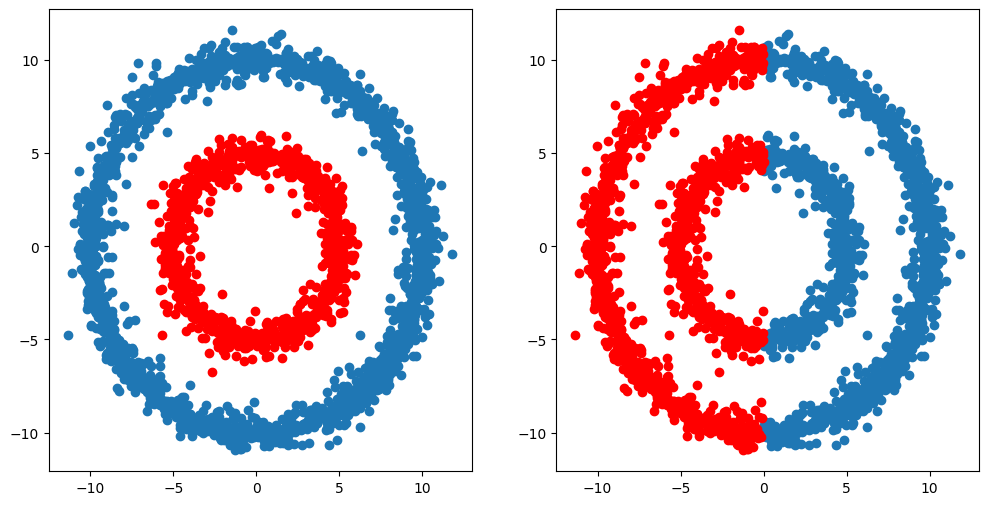

In [147]:
points1 = generate_circle_points(2000, radius=10.0, dispersion=0.8)
points2 = generate_circle_points(1000, radius=5.0, dispersion=0.8)
# plt.figure(figsize=(6,6))
# plt.scatter(x = [x[0] for x in points1], y= [y[1] for y in points1])
# plt.scatter(x = [x[0] for x in points2], y= [y[1] for y in points2],c='red')

f, ax = plt.subplots(1,2,figsize = (12,6))
ax[0].scatter(x = [x[0] for x in points1], y= [y[1] for y in points1])
ax[0].scatter(x = [x[0] for x in points2], y= [y[1] for y in points2],c='red')


combined = np.concatenate((points1,points2))
s1 = combined[combined[:,0]>0]
s2 = combined[combined[:,0]<=0]
ax[1].scatter(x = [x[0] for x in s1], y= [y[1] for y in s1])
ax[1].scatter(x = [x[0] for x in s2], y= [y[1] for y in s2], c = 'red')

plt.show()

Complex data structure
-> DBSCAN
_ 

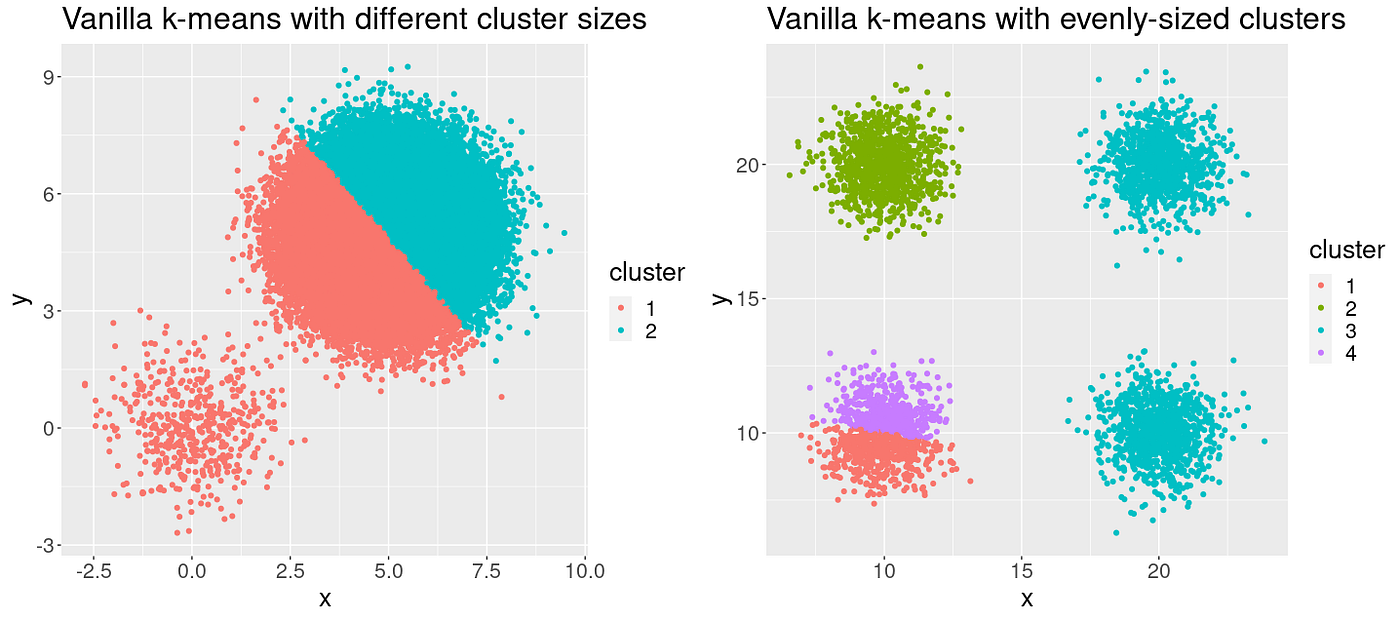

Density issue
-> DBSCAN (classify based on density of data)

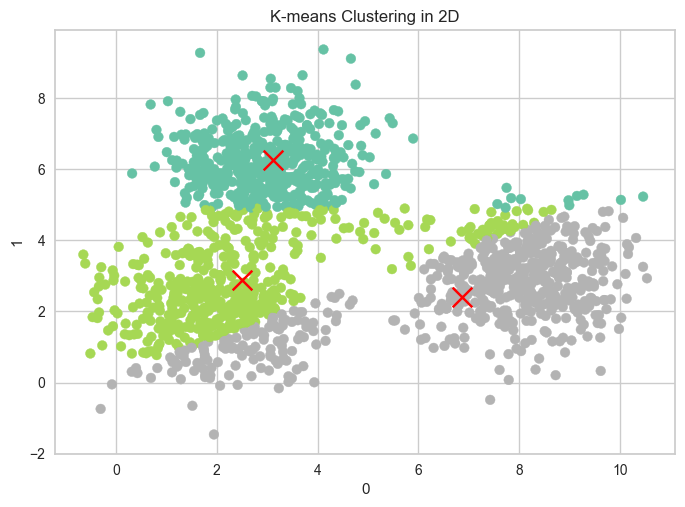

Bad initial
-> Re implement kmeans

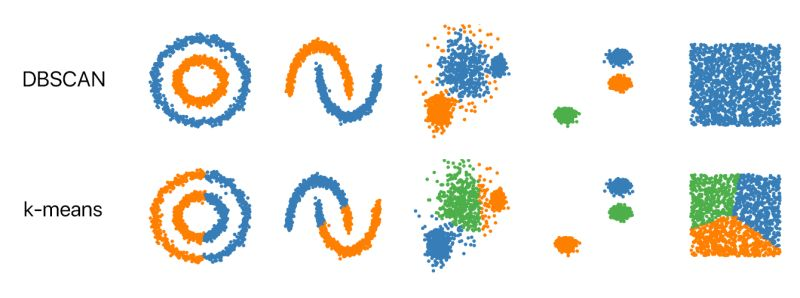

In [ ]:
import numpy as np

def gaussian_pdf(x, mean, cov):
  """
  Calculates the probability density function of a data point under a Gaussian distribution.

  Args:
      x (np.ndarray): A data point (1D array).
      mean (np.ndarray): Mean vector of the Gaussian distribution.
      cov (np.ndarray): Covariance matrix of the Gaussian distribution.

  Returns:
      float: The probability density of x under the Gaussian distribution.
  """
  d = len(mean)
  x_m = x - mean
  return np.exp(-0.5 * np.dot(x_m.T, np.dot(cov, x_m))) / ((2 * np.pi) ** (d / 2) * np.linalg.det(cov) ** 0.5)

class GMM:
  """
  A simple implementation of Gaussian Mixture Model (GMM) using the EM algorithm.
  """
  def __init__(self, n_components, max_iter=100):
    """
    Initializes the GMM model.

    Args:
        n_components (int): The number of Gaussian distributions in the mixture.
        max_iter (int, optional): The maximum number of iterations for the EM algorithm. Defaults to 100.
    """
    self.n_components = n_components
    self.max_iter = max_iter
    self.weights = np.random.rand(n_components)  # Mixing coefficients
    self.weights /= np.sum(self.weights)  # Normalize weights to sum to 1
    self.means = np.random.rand(n_components, data.shape[1])  # Initialize means randomly
    self.covariances = [np.eye(data.shape[1]) for _ in range(n_components)]  # Initialize covariances to identity matrices

  def fit(self, data):
    """
    Fits the GMM model to the data using the EM algorithm.

    Args:
        data (np.ndarray): The data used to train the model, with each row representing a data point.
    """
    for _ in range(self.max_iter):
      # E-step: Calculate responsibilities (expected probability of belonging to each component)
      responsibilities = np.zeros((data.shape[0], self.n_components))
      for k in range(self.n_components):
        responsibilities[:, k] = self.weights[k] * gaussian_pdf(data, self.means[k], self.covariances[k])
      responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

      # M-step: Update model parameters
      self.weights = np.mean(responsibilities, axis=0)
      for k in range(self.n_components):
        self.means[k] = np.dot(data.T, responsibilities[:, k]) / np.sum(responsibilities[:, k])
        covariance = np.dot(responsibilities[:, k] * (data - self.means[k]), (data - self.means[k]).T) / np.sum(responsibilities[:, k])
        self.covariances[k] = (covariance + covariance.T) / 2  # Ensure symmetry

  def predict(self, new_data):
    """
    Predicts the most likely component (cluster) for each new data point.

    Args:
        new_data (np.ndarray): The data points for which to predict cluster labels.

    Returns:
        np.ndarray: An array containing the predicted cluster labels for each new data point.
    """
    log_probs = np.zeros((new_data.shape[0], self.n_components))
    for k in range(self.n_components):
      log_probs[:, k] = np.log(self.weights[k]) + gaussian_pdf(new_data, self.means[k], self.covariances[k])
    return np.argmax(log_probs, axis=1)

# Example usage (replace with your actual data)
data = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6]])

# Define the number of clusters

In [ ]:
def Kmeans(data, n_clusters, iterations = 100):

    n_sample = data.shape[0]
    # chose random points as centroids
    indexes = np.random.choice(n_sample, n_clusters, replace= False)
    centroids = data[indexes]

    for _ in range(iterations):
        # label
        labels = np.argmin(np.linalg.norm(data[:,None], centroids, norm = 2), axis= 1)

        old_centroids = centroids

        for i in range(n_clusters):
            centroids[i] = np.mean(data[labels == i], axis=0)

        # Check for stop conditioln
        if np.all(old_centroids == centroids):
            break
    
    return centroids, labels

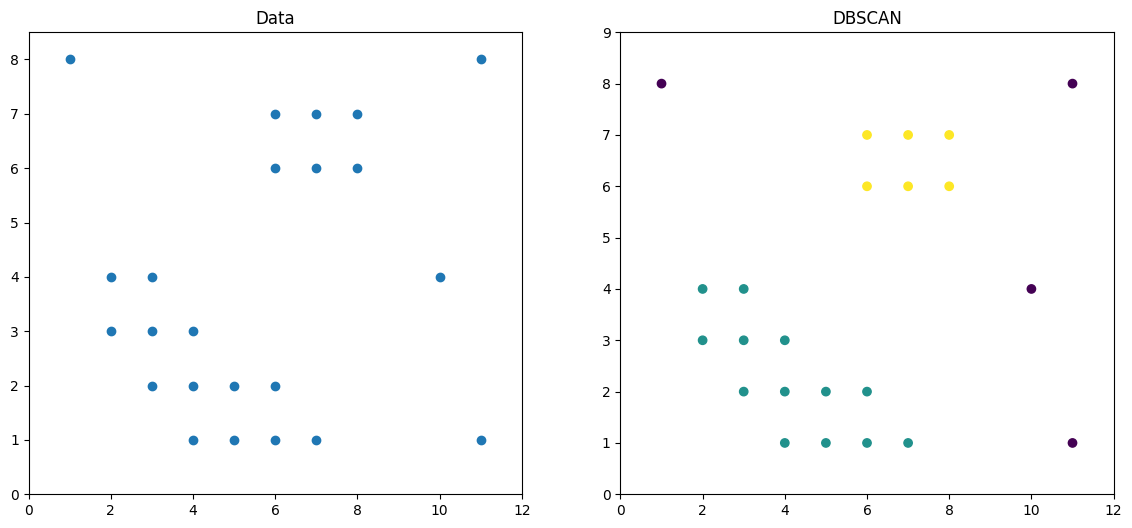

In [22]:
data = np.array([[1,8],[2,3],[2,4],[3,2],[3,3],[3,4],[4,1],[4,2],[4,3],[5,1],[5,2],[6,1],[6,2],[6,6],[6,7],[7,1],[7,6],[7,7],[8,6],[8,7],[10,4],[11,1],[11,8]])
from sklearn.cluster import dbscan
id, labels = dbscan(data, eps=1.5,min_samples=3)

f, ax = plt.subplots(1,2,figsize=(14,6))

ax[0].scatter(x = [i[0] for i in data], y = [i[1] for i in data])
ax[0].set_xlim((0,12))
ax[0].set_ylim((0,8.5))
ax[0].set_title('Data')

ax[1].scatter(x = [i[0] for i in data], y = [i[1] for i in data], c=labels)
ax[1].set_xlim((0,12))
ax[1].set_ylim((0,9))
ax[1].set_title('DBSCAN')
plt.show()
